# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
import json
import os
import csv


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [32]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [33]:
print(cities)

['cidreira', 'busselton', 'saskylakh', 'attawapiskat', 'la ronge', 'pevek', 'namtsy', 'rikitea', 'tuggurt', 'airai', 'bluff', 'mataura', 'georgetown', 'lebu', 'port elizabeth', 'amderma', 'anopino', 'shingu', 'pacific grove', 'saint-philippe', 'bisira', 'avera', 'dukat', 'rawson', 'labuhan', 'torbay', 'kaeo', 'nanortalik', 'upernavik', 'narsaq', 'nikolskoye', 'bethel', 'arona', 'tasiilaq', 'hermanus', 'grand-santi', 'bredasdorp', 'faanui', 'jamestown', 'khandagayty', 'illoqqortoormiut', 'taolanaro', 'cabo san lucas', 'tuktoyaktuk', 'yar-sale', 'belushya guba', 'punta arenas', 'greiz', 'warqla', 'general roca', 'clyde river', 'longyearbyen', 'qaanaaq', 'kapaa', 'kazalinsk', 'fairbanks', 'itoman', 'lolua', 'bowen', 'brae', 'makakilo city', 'ushuaia', 'cape town', 'kruisfontein', 'new norfolk', 'hobart', 'nalut', 'mys shmidta', 'san quintin', 'kaputa', 'port-cartier', 'talnakh', 'arraial do cabo', 'mahebourg', 'hasaki', 'karaul', 'atuona', 'severo-kurilsk', 'kahului', 'mar del plata', 'br

In [137]:
#Declare an empty list for cities
citylist=[]
#Declare an empty list to store the full responses
response_json = []
#Declare an empty list to store the required attributes
citynamelist = []
latitude = []
temperature = []
humidity = []
cloudiness = []
windspeed = []
maxtemp = []


#Break URL Into Parts for troubleshooting    
url1='https://api.openweathermap.org/data/2.5/weather?q='
url2='&appid='
url3='&units=imperial'

#Populate list with a couple vaules
citylist=cities

#Timeout Related Variables
TimeoutPeriod=60
TimeoutAfterCount=50
#Variable for process finished notification
TotalRecordsProcessed=len(citylist)

##########################################################
#BEGIN : LOOP a request for each of the values in the list of cities, 
#Pause for 60 sec if the Request count is divisible by 50. 
##########################################################
for x in range(len(citylist)):
    if x%TimeoutAfterCount == 0:
        print(f"{TimeoutPeriod} second timeout will commence, then process will continue.")
        time.sleep(TimeoutPeriod)
        #print(f"Request number: {x+1} for City named: {citylist[x]}")

        #Setting the CityName for URL
        cityname=citylist[x]
        
        #Build out URL from parts 
        FullCityNameAPIURL=url1+str(cityname)+url2+str(weather_api_key)+url3

        # Get the response
        post_response = requests.get(FullCityNameAPIURL).json()

        #If the response Succeeds, place values in appropriate lists          
        if 200 == post_response['cod'] :
            print(f"Request number: {x+1} for City named: {citylist[x]} SUCCESS")
            #print(f"Request URL/URI: {FullCityNameAPIURL}")
            # Save post's JSON
            response_json.append(post_response)
            citynamelist.append(post_response['name'])        
            latitude.append(post_response['coord']['lat'])
            temperature.append(post_response['main']['temp'])
            humidity.append(post_response['main']['humidity']) 
            cloudiness.append(post_response['clouds']['all'])
            windspeed.append(post_response['wind']['speed'])
            maxtemp.append(post_response['main']['temp_max'])
        #If the response Fails, then Note Request Failed  
        elif "404" == post_response['cod']  :
            print(f"Request number: {x+1} for City named: {citylist[x]} FAILED")
            #print(f"Request URL/URI: {FullCityNameAPIURL}")
        else:
            print(f"Request number: {x+1} for City named: {citylist[x]} OTHER ERROR")
            #print(f"Request URL/URI: {FullCityNameAPIURL}")
    else:
        #print(f"Request number: {x+1} for City named: {citylist[x]}")

        #Setting the CityName for URL
        cityname=citylist[x]
        
        #Build out URL from parts 
        FullCityNameAPIURL=url1+str(cityname)+url2+str(weather_api_key)+url3

        # Get the response
        post_response = requests.get(FullCityNameAPIURL).json()
       
        #If the response Succeeds, place values in appropriate lists   
        if 200 == post_response['cod']  :
            print(f"Request number: {x+1} for City named: {citylist[x]} SUCCESS")
            #print(f"Request URL/URI: {FullCityNameAPIURL}")
            # Save post's JSON
            response_json.append(post_response)            
            citynamelist.append(post_response['name'])        
            latitude.append(post_response['coord']['lat'])
            temperature.append(post_response['main']['temp'])
            humidity.append(post_response['main']['humidity']) 
            cloudiness.append(post_response['clouds']['all'])
            windspeed.append(post_response['wind']['speed'])
            maxtemp.append(post_response['main']['temp_max'])
        #If the response Fails, then Note Request Failed    
        elif "404" == post_response['cod'] :
            print(f"Request number: {x+1} for City named: {citylist[x]} FAILED")
            #print(f"Request URL/URI: {FullCityNameAPIURL}")
        else:
            print(f"Request number: {x+1} for City named: {citylist[x]} OTHER ERROR")
            #print(f"Request URL/URI: {FullCityNameAPIURL}")
      
        
print(f"")
print(f"PROCESS COMPLETED. {TotalRecordsProcessed} Requests processed. ")
print(f"")   
##########################################################
#END : LOOP 
########################################################## 
    
    
#############################
#Single City API URL Build
#############################
#cityname='yellowknife'

#CityNameAPIURL='https://api.openweathermap.org/data/2.5/weather?q={cityname}&appid={weather_api_key}'

#Break URL Into Parts for troubleshooting    
#url1='https://api.openweathermap.org/data/2.5/weather?q='
#url2='&appid='

#Build out URL from parts 
#FullCityNameAPIURL=url1+str(cityname)+url2+str(weather_api_key)
#Review URL Built
#print(FullCityNameAPIURL)

# Get one of the posts
#post_response = requests.get(FullCityNameAPIURL)

# Save post's JSON
#response_json.append(post_response.json())
#############################
#END Single City API URL Build
#############################



# Make a request for each of the values in the list of cities
#for x in range(len(cities)):
#    print(f"Making request number: {x} for ID: {indices[x]}")

    # Get one of the posts
    #post_response = requests.get(url + str(indices[x]))

    # Save post's JSON
    #response_json.append(post_response.json())


#############################
#BEGIN Request Send and Response handling
############################# 
# Pretty Print the output of the JSON
#response = requests.get(FullCityNameAPIURL).json()
#print(json.dumps(response, indent=4, sort_keys=True))
#############################
#END Request Send and Response handling
#############################


#############################
#BEGIN TROUBLESHOOT API CREDS - Functional
#############################
#Set Latitude and Longitude for single Location
#lat=43.3814
#lon=-92.1141

#Setting the URL/URI of the API to be consumed
#url='https://api.openweathermap.org/data/2.5/weather?lat={lat}lon={lon}&appid={weather_api_key}'
    
#Break URL Into Parts for troubleshooting    
#url1='https://api.openweathermap.org/data/2.5/weather?lat='
#url2='&lon='
#url3='&appid='

#Build out URL from parts for review
#FullURL=url1+str(lat)+url2+str(lon)+url3+str(weather_api_key)
#print(FullURL)
#############################
#END TROUBLESHOOT API CREDS
#############################
  
    
#############################
#BEGIN Generic Response Troubleshooting
#############################    
# Print the response to console
#print(requests.get(url))

# Retrieving data convert to JSON
#print(requests.get(url).json())
#############################
#END Generic Response Troubleshooting
#############################

60 second timeout will commence, then process will continue.
Request number: 1 for City named: cidreira SUCCESS
Request number: 2 for City named: busselton SUCCESS
Request number: 3 for City named: saskylakh SUCCESS
Request number: 4 for City named: attawapiskat FAILED
Request number: 5 for City named: la ronge SUCCESS
Request number: 6 for City named: pevek SUCCESS
Request number: 7 for City named: namtsy SUCCESS
Request number: 8 for City named: rikitea SUCCESS
Request number: 9 for City named: tuggurt FAILED
Request number: 10 for City named: airai SUCCESS
Request number: 11 for City named: bluff SUCCESS
Request number: 12 for City named: mataura SUCCESS
Request number: 13 for City named: georgetown SUCCESS
Request number: 14 for City named: lebu SUCCESS
Request number: 15 for City named: port elizabeth SUCCESS
Request number: 16 for City named: amderma FAILED
Request number: 17 for City named: anopino SUCCESS
Request number: 18 for City named: shingu SUCCESS
Request number: 19 for 

Request number: 153 for City named: hamilton SUCCESS
Request number: 154 for City named: barentsburg FAILED
Request number: 155 for City named: portland SUCCESS
Request number: 156 for City named: lompoc SUCCESS
Request number: 157 for City named: karamay FAILED
Request number: 158 for City named: port-gentil SUCCESS
Request number: 159 for City named: ulladulla SUCCESS
Request number: 160 for City named: shitanjing SUCCESS
Request number: 161 for City named: mehamn SUCCESS
Request number: 162 for City named: nouadhibou SUCCESS
Request number: 163 for City named: magadan SUCCESS
Request number: 164 for City named: nanga eboko SUCCESS
Request number: 165 for City named: dillon SUCCESS
Request number: 166 for City named: zhezkazgan SUCCESS
Request number: 167 for City named: dikson SUCCESS
Request number: 168 for City named: nizhneyansk FAILED
Request number: 169 for City named: champerico SUCCESS
Request number: 170 for City named: barbar FAILED
Request number: 171 for City named: saint

Request number: 304 for City named: san policarpo SUCCESS
Request number: 305 for City named: zenzeli SUCCESS
Request number: 306 for City named: sistranda SUCCESS
Request number: 307 for City named: warrnambool SUCCESS
Request number: 308 for City named: bolungarvik FAILED
Request number: 309 for City named: grand river south east FAILED
Request number: 310 for City named: armacao dos buzios FAILED
Request number: 311 for City named: la romana SUCCESS
Request number: 312 for City named: puerto ayora SUCCESS
Request number: 313 for City named: geelong SUCCESS
Request number: 314 for City named: guerrero negro SUCCESS
Request number: 315 for City named: sechura SUCCESS
Request number: 316 for City named: bagdarin SUCCESS
Request number: 317 for City named: iqaluit SUCCESS
Request number: 318 for City named: ambon SUCCESS
Request number: 319 for City named: kuusamo SUCCESS
Request number: 320 for City named: itirucu SUCCESS
Request number: 321 for City named: chardara SUCCESS
Request num

Request number: 454 for City named: camacha SUCCESS
Request number: 455 for City named: magaria SUCCESS
Request number: 456 for City named: alta floresta SUCCESS
Request number: 457 for City named: westport SUCCESS
Request number: 458 for City named: iskateley SUCCESS
Request number: 459 for City named: belmonte SUCCESS
Request number: 460 for City named: talcahuano SUCCESS
Request number: 461 for City named: aguimes SUCCESS
Request number: 462 for City named: pervomayskiy SUCCESS
Request number: 463 for City named: adrar SUCCESS
Request number: 464 for City named: chipinge SUCCESS
Request number: 465 for City named: san cristobal SUCCESS
Request number: 466 for City named: gorontalo SUCCESS
Request number: 467 for City named: benemerito de las americas SUCCESS
Request number: 468 for City named: guangyuan SUCCESS
Request number: 469 for City named: thinadhoo SUCCESS
Request number: 470 for City named: sturgis SUCCESS
Request number: 471 for City named: ancud SUCCESS
Request number: 47

Request number: 605 for City named: blackfoot SUCCESS
Request number: 606 for City named: benghazi SUCCESS
Request number: 607 for City named: bonoua SUCCESS
Request number: 608 for City named: honningsvag SUCCESS
Request number: 609 for City named: lata SUCCESS
Request number: 610 for City named: poco verde SUCCESS
Request number: 611 for City named: trinidad SUCCESS
Request number: 612 for City named: caloundra SUCCESS
Request number: 613 for City named: falam SUCCESS
Request number: 614 for City named: azogues SUCCESS
Request number: 615 for City named: shelburne SUCCESS
Request number: 616 for City named: chatra SUCCESS
Request number: 617 for City named: chavakkad SUCCESS
Request number: 618 for City named: mahajanga SUCCESS
Request number: 619 for City named: batagay-alyta SUCCESS
Request number: 620 for City named: pavilosta SUCCESS
Request number: 621 for City named: cuamba SUCCESS
Request number: 622 for City named: palmer SUCCESS
Request number: 623 for City named: bilma SUCC

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [138]:
#Checkscript to see how many values were in each list
print(F"citynamelist Count: {len(citynamelist)}")
print(F"latitude Count: {len(latitude)}")
print(F"temperature Count: {len(temperature)}")
print(F"humidity Count: {len(humidity)}")
print(F"cloudiness Count: {len(cloudiness)}")
print(F"windspeed Count: {len(windspeed)}")
print(F"maxtemp Count: {len(maxtemp)}")

citynamelist Count: 573
latitude Count: 573
temperature Count: 573
humidity Count: 573
cloudiness Count: 573
windspeed Count: 573
maxtemp Count: 573


In [195]:
# create a data frame from cities, lat, and temp
response_dict = {
    "citynamelist": citynamelist,
    "latitude": latitude,
    "temperature": temperature,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "windspeed": windspeed,
    "maxtemp": maxtemp
}


# Total Records Pulled back: 573
weather_df = pd.DataFrame(response_dict)
weather_df.head(573)

weather_df.to_csv(output_data_file)


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [142]:
#weather_df.head(573)

weather_df[weather_df['humidity'] > 100]

print('No cities have humidity higher than 100. Moving onward.')

,citynamelist,latitude,temperature,humidity,cloudiness,windspeed,maxtemp


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [53]:
weather_df.head()

,citynamelist,latitude,temperature,humidity,cloudiness,windspeed
0,Cidreira,-30.1811,292.57,82,0,5.48
1,Busselton,-33.6500,286.04,89,18,1.28
2,Saskylakh,71.9167,267.68,95,100,3.69
3,La Ronge,55.1001,287.29,24,20,3.09
4,Pevek,69.7008,272.03,76,99,4.56


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

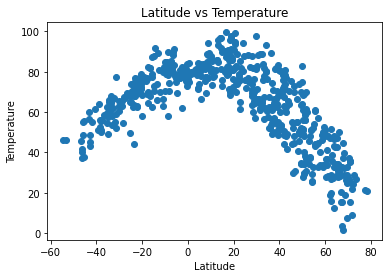

This plot illustrates that the closer one gets to the equatory, the temperature generally is higher. Note how the value for temperature increases as the latitude values approach zero. 


In [200]:
# Create Scatter Plot Latitude vs Temperature
Latitude = weather_df['latitude']
Temperature = weather_df['temperature']
plt.scatter(Latitude,Temperature)
plt.title('Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
# Final Run- Save Figure
plt.savefig("Images/01_LatitudevsTemperature.png")
plt.show()
print('This plot illustrates that the closer one gets to the equatory, the temperature generally is higher. Note how the value for temperature increases as the latitude values approach zero. ');


## Latitude vs. Humidity Plot

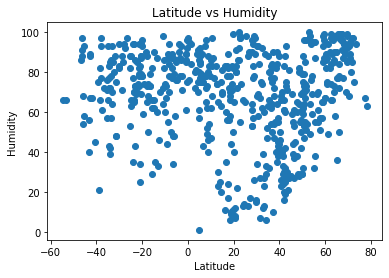

This plot illustrates that Humidity and Latitude are not especially related.


In [201]:
# Create a Scatter Plot for latitude vs Humidity
Latitude = weather_df['latitude']
Humidity = weather_df['humidity']
plt.scatter(Latitude,Humidity)
plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
# Final Run- Save Figure
plt.savefig("Images/02_LatitudevsHumidity.png")
plt.show()

print('This plot illustrates that Humidity and Latitude are not especially related.')


## Latitude vs. Cloudiness Plot

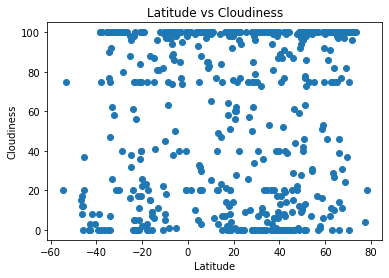

This plot illustrates that Latitude and Cloudiness are not especially related.


In [202]:
# Create a Scatter Plot for latitude vs Cloudiness
Latitude = weather_df['latitude']
Cloudiness = weather_df['cloudiness']
plt.scatter(Latitude,Cloudiness)
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# Final Run- Save Figure
plt.savefig("Images/03_LatitudevsCloudiness.png")
plt.show()

print('This plot illustrates that Latitude and Cloudiness are not especially related.')

## Latitude vs. Wind Speed Plot

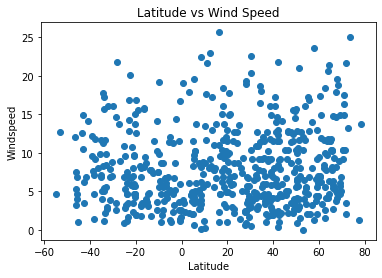

This plot illustrates that Latitude and Cloudiness are not especially related.


In [203]:
# Create a Scatter Plot for latitude vs Wind Speed
Latitude = weather_df['latitude']
Windspeed = weather_df['windspeed']
plt.scatter(Latitude,Windspeed)
plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
# Final Run- Save Figure
plt.savefig("Images/04_LatitudevsWindSpeed.png")
plt.show()

print('This plot illustrates that Latitude and Cloudiness are not especially related.')

## Linear Regression

In [204]:
# Perform a linear regression on temperature vs. latitude
#Change the datatype of the latitude list
latitude = pd.to_numeric(latitude)

#Find values for regression input
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(latitude, temperature)

# Get regression values
regress_values = latitude * slope + intercept
print(regress_values)

[77.8711127  78.86159405 48.7189415  53.52061599 49.35165147 51.34600561
 75.85502958 71.80227651 82.55923118 82.44293407 67.70837831 79.99421314
 78.93811658 53.34986796 59.6215174  58.7979294  75.35197961 66.82083118
 59.77550471 51.39343244 81.61703327 71.21916342 55.64311681 79.27561519
 52.08065044 48.47050025 51.85979157 52.20619879 57.44065387 61.23011804
 50.51842017 79.08108236 68.03993786 79.11349022 73.95995486 57.23341487
 54.76747637 62.71736766 49.42209217 50.17041398 84.42946464 54.79126117
 80.39869752 49.13224881 46.91954849 47.12930016 62.95027597 50.74019273
 61.79401484 74.96885301 52.00835378 63.1582288  84.90059215 78.94034372
 78.96247244 81.46924199 81.49688148 60.5923256  60.54949583 71.6715886
 54.96732009 49.41284094 75.81100058 75.08061017 59.05045375 72.05166001
 54.7830093  63.28734629 80.10431421 78.37618994 75.06196494 69.42476722
 59.19010736 75.30672282 82.22136138 50.99845627 56.20158851 59.87829617
 61.73653729 76.04285242 69.98852125 55.16188148 75.

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The regression line equation is: y = -0.91x +96.6


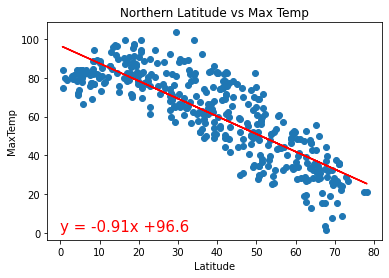

This plot illustrates that Latitude and Max Temp are really well correlated as the latitude value approaches the equator.


In [205]:
# Perform a linear regression on Max Temp vs. Latitude Linear Regression                        DONE
LatitudeNorthernHemisphere=[]
MaxTempNorthernHemisphere=[]

NorthHemisphere_df=weather_df[weather_df['latitude']> 0]
LatitudeNorthernHemisphere=NorthHemisphere_df['latitude']
MaxTempNorthernHemisphere=NorthHemisphere_df['maxtemp']
  
#Change the datatype of the Lists
LatitudeNorthernHemisphere = pd.to_numeric(LatitudeNorthernHemisphere)
MaxTempNorthernHemisphere = pd.to_numeric(MaxTempNorthernHemisphere)    
    
#Checkscripts    
#print(LatitudeNorthernHemisphere)
#print(MaxTempNorthernHemisphere)

#Find values for regression input
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(LatitudeNorthernHemisphere, MaxTempNorthernHemisphere)

# Get regression values
regress_values = LatitudeNorthernHemisphere * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(F"The regression line equation is: {line_eq}")


# Create a Scatter Plot for latitude vs Wind Speed
Latitude = LatitudeNorthernHemisphere
MaxTemp = MaxTempNorthernHemisphere
plt.scatter(Latitude,MaxTemp)
plt.plot(LatitudeNorthernHemisphere,regress_values,"r-")
plt.annotate(line_eq,(0,1),fontsize=15,color="red")
plt.title('Northern Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('MaxTemp')
# Final Run- Save Figure
plt.savefig("Images/05_NORTHLatitudevsMaxTemp.png")
plt.show();

print('This plot illustrates that Latitude and Max Temp are really well correlated as the latitude value approaches the equator.')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The regression line equation is: y = 0.71x +84.52


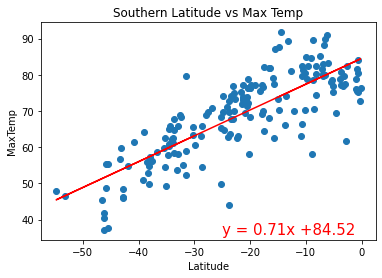

This plot illustrates that Latitude and Max Temp are really well correlated as the latitude value approaches the equator.


In [206]:
# Perform a linear regression on temperature vs. latitude                        DONE
LatitudeSouthernHemisphere=[]
MaxTempSouthernHemisphere=[]

SouthHemisphere_df=weather_df[weather_df['latitude']< 0]
LatitudeSouthernHemisphere=SouthHemisphere_df['latitude']
MaxTempSouthernHemisphere=SouthHemisphere_df['maxtemp']
  
#Change the datatype of the Lists
LatitudeSouthernHemisphere = pd.to_numeric(LatitudeSouthernHemisphere)
MaxTempSouthernHemisphere = pd.to_numeric(MaxTempSouthernHemisphere)    
    
#Checkscripts    
#print(LatitudeSouthernHemisphere)
#print(MaxTempSouthernHemisphere)


#Find values for regression input
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(LatitudeSouthernHemisphere, MaxTempSouthernHemisphere)

# Get regression values
regress_values = LatitudeSouthernHemisphere * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(F"The regression line equation is: {line_eq}")


# Create a Scatter Plot for latitude vs Wind Speed
Latitude = LatitudeSouthernHemisphere
MaxTemp = MaxTempSouthernHemisphere
plt.scatter(Latitude,MaxTemp)
plt.plot(LatitudeSouthernHemisphere,regress_values,"r-")
plt.annotate(line_eq,(-25,36),fontsize=15,color="red")
plt.title('Southern Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('MaxTemp')
# Final Run- Save Figure
plt.savefig("Images/06_SOUTHLatitudevsMaxTemp.png")
plt.show();

print('This plot illustrates that Latitude and Max Temp are really well correlated as the latitude value approaches the equator.')


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The regression line equation is: y = 0.21x +58.06


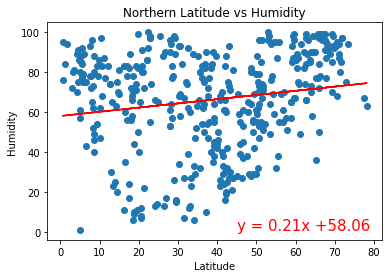

This plot shows a slight correlation between Latitude and Humidity.


In [207]:
# Perform a linear regression on temperature vs. latitude                        DONE
LatitudeNorthernHemisphere=[]
HumidityNorthernHemisphere=[]

NorthHemisphere_df=weather_df[weather_df['latitude']> 0]
LatitudeNorthernHemisphere=NorthHemisphere_df['latitude']
HumidityNorthernHemisphere=NorthHemisphere_df['humidity']
  
#Change the datatype of the Lists
LatitudeNorthernHemisphere = pd.to_numeric(LatitudeNorthernHemisphere)
HumidityNorthernHemisphere = pd.to_numeric(HumidityNorthernHemisphere)    
    
#Checkscripts    
#print(LatitudeNorthernHemisphere)
#print(HumidityNorthernHemisphere)

#Find values for regression input
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(LatitudeNorthernHemisphere, HumidityNorthernHemisphere)

# Get regression values
regress_values = LatitudeNorthernHemisphere * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(F"The regression line equation is: {line_eq}")


# Create a Scatter Plot for latitude vs Wind Speed
Latitude = LatitudeNorthernHemisphere
Humidity = HumidityNorthernHemisphere
plt.scatter(Latitude,Humidity)
plt.plot(LatitudeNorthernHemisphere,regress_values,"r-")
plt.annotate(line_eq,(45,1),fontsize=15,color="red")
plt.title('Northern Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
# Final Run- Save Figure
plt.savefig("Images/07_NORTHLatitudevsHumidity.png")
plt.show();

print('This plot shows a slight correlation between Latitude and Humidity.')


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The regression line equation is: y = 0.12x +76.3


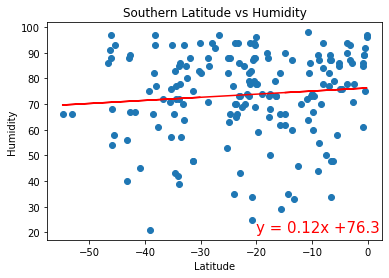

This plot shows a slight correlation between Latitude and Humidity.


In [208]:
# Perform a linear regression on temperature vs. latitude                        DONE
LatitudeSouthernHemisphere=[]
HumiditySouthernHemisphere=[]

SouthHemisphere_df=weather_df[weather_df['latitude']< 0]
LatitudeSouthernHemisphere=SouthHemisphere_df['latitude']
HumiditySouthernHemisphere=SouthHemisphere_df['humidity']
  
#Change the datatype of the Lists
LatitudeSouthernHemisphere = pd.to_numeric(LatitudeSouthernHemisphere)
HumiditySouthernHemisphere = pd.to_numeric(HumiditySouthernHemisphere)    
    
#Checkscripts    
#print(LatitudeSouthernHemisphere)
#print(HumiditySouthernHemisphere)

#Find values for regression input
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(LatitudeSouthernHemisphere, HumiditySouthernHemisphere)

# Get regression values
regress_values = LatitudeSouthernHemisphere * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(F"The regression line equation is: {line_eq}")


# Create a Scatter Plot for latitude vs Wind Speed
Latitude = LatitudeSouthernHemisphere
Humidity = HumiditySouthernHemisphere
plt.scatter(Latitude,Humidity)
plt.plot(LatitudeSouthernHemisphere,regress_values,"r-")
plt.annotate(line_eq,(-20,20),fontsize=15,color="red")
plt.title('Southern Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
# Final Run- Save Figure
plt.savefig("Images/08_SOUTHLatitudevsHumidity.png")
plt.show();

print('This plot shows a slight correlation between Latitude and Humidity.')


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The regression line equation is: y = 0.14x +55.4


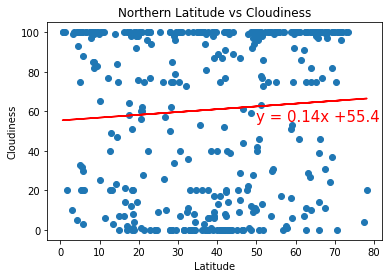

This plot shows a slight correlation between Latitude and Cloudiness, with higher latitudes having more slightly cloudiness.


In [209]:
# Perform a linear regression on temperature vs. latitude                        DONE
LatitudeNorthernHemisphere=[]
CloudinessNorthernHemisphere=[]

NorthHemisphere_df=weather_df[weather_df['latitude']> 0]
LatitudeNorthernHemisphere=NorthHemisphere_df['latitude']
CloudinessNorthernHemisphere=NorthHemisphere_df['cloudiness']
  
#Change the datatype of the Lists
LatitudeNorthernHemisphere = pd.to_numeric(LatitudeNorthernHemisphere)
CloudinessNorthernHemisphere = pd.to_numeric(CloudinessNorthernHemisphere)    
    
#Checkscripts    
#print(LatitudeNorthernHemisphere)
#print(CloudinessNorthernHemisphere)

#Find values for regression input
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(LatitudeNorthernHemisphere, CloudinessNorthernHemisphere)

# Get regression values
regress_values = LatitudeNorthernHemisphere * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(F"The regression line equation is: {line_eq}")


# Create a Scatter Plot for latitude vs Wind Speed
Latitude = LatitudeNorthernHemisphere
Cloudiness = CloudinessNorthernHemisphere
plt.scatter(Latitude,Cloudiness)
plt.plot(LatitudeNorthernHemisphere,regress_values,"r-")
plt.annotate(line_eq,(50,55),fontsize=15,color="red")
plt.title('Northern Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# Final Run- Save Figure
plt.savefig("Images/09_NORTHLatitudevsCloudiness.png")
plt.show();

print('This plot shows a slight correlation between Latitude and Cloudiness, with higher latitudes having more slightly cloudiness.')


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The regression line equation is: y = 0.81x +73.07


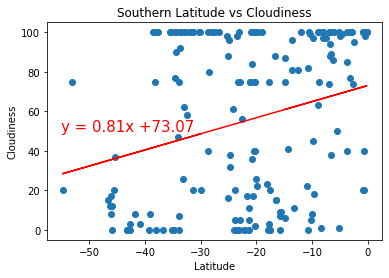

This plot shows that latitudes closer to the equator had higher cloudiness coverage, which does not correlate with the previous plot.


In [210]:
# Perform a linear regression on temperature vs. latitude                       DONE
LatitudeSouthernHemisphere=[]
CloudinessSouthernHemisphere=[]

SouthHemisphere_df=weather_df[weather_df['latitude']< 0]
LatitudeSouthernHemisphere=SouthHemisphere_df['latitude']
CloudinessSouthernHemisphere=SouthHemisphere_df['cloudiness']
  
#Change the datatype of the Lists
LatitudeSouthernHemisphere = pd.to_numeric(LatitudeSouthernHemisphere)
CloudinessSouthernHemisphere = pd.to_numeric(CloudinessSouthernHemisphere)    
    
#Checkscripts    
#print(LatitudeSouthernHemisphere)
#print(CloudinessSouthernHemisphere)

#Find values for regression input
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(LatitudeSouthernHemisphere, CloudinessSouthernHemisphere)

# Get regression values
regress_values = LatitudeSouthernHemisphere * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(F"The regression line equation is: {line_eq}")


# Create a Scatter Plot for latitude vs Wind Speed
Latitude = LatitudeSouthernHemisphere
Cloudiness = CloudinessSouthernHemisphere
plt.scatter(Latitude,Cloudiness)
plt.plot(LatitudeSouthernHemisphere,regress_values,"r-")
plt.annotate(line_eq,(-55,50),fontsize=15,color="red")
plt.title('Southern Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# Final Run- Save Figure
plt.savefig("Images/10_SOUTHLatitudevsCloudiness.png")
plt.show();

print('This plot shows that latitudes closer to the equator had higher cloudiness coverage, which does not correlate with the previous plot.')


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The regression line equation is: y = 0.02x +7.45


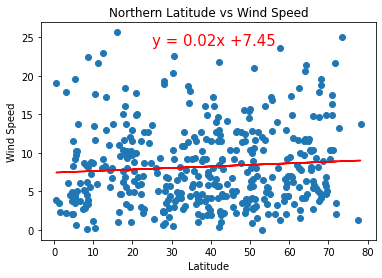

This plot shows no corelation between Latitude and Wind Speed. 


In [211]:
# Perform a linear regression on temperature vs. latitude                        DONE
LatitudeNorthernHemisphere=[]
WindspeedNorthernHemisphere=[]

NorthHemisphere_df=weather_df[weather_df['latitude']> 0]
LatitudeNorthernHemisphere=NorthHemisphere_df['latitude']
WindspeedNorthernHemisphere=NorthHemisphere_df['windspeed']
  
#Change the datatype of the Lists
LatitudeNorthernHemisphere = pd.to_numeric(LatitudeNorthernHemisphere)
WindspeedNorthernHemisphere = pd.to_numeric(WindspeedNorthernHemisphere)    
    
#Checkscripts    
#print(LatitudeNorthernHemisphere)
#print(WindspeedNorthernHemisphere)

#Find values for regression input
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(LatitudeNorthernHemisphere, WindspeedNorthernHemisphere)

# Get regression values
regress_values = LatitudeNorthernHemisphere * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(F"The regression line equation is: {line_eq}")


# Create a Scatter Plot for latitude vs Wind Speed
Latitude = LatitudeNorthernHemisphere
Windspeed = WindspeedNorthernHemisphere
plt.scatter(Latitude,Windspeed)
plt.plot(LatitudeNorthernHemisphere,regress_values,"r-")
plt.annotate(line_eq,(25,24),fontsize=15,color="red")
plt.title('Northern Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
# Final Run- Save Figure
plt.savefig("Images/11_NORTHLatitudevsWindspeed.png")
plt.show();

print('This plot shows no corelation between Latitude and Wind Speed. ')


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The regression line equation is: y = -0.05x +6.24


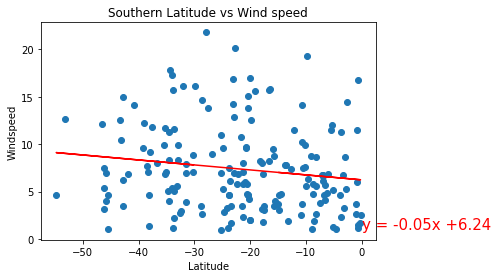

This plot shows no corelation between Latitude and Wind Speed.


In [212]:
# Perform a linear regression on temperature vs. latitude                        DONE
LatitudeSouthernHemisphere=[]
WindspeedSouthernHemisphere=[]

SouthHemisphere_df=weather_df[weather_df['latitude']< 0]
LatitudeSouthernHemisphere=SouthHemisphere_df['latitude']
WindspeedSouthernHemisphere=SouthHemisphere_df['windspeed']
  
#Change the datatype of the Lists
LatitudeSouthernHemisphere = pd.to_numeric(LatitudeSouthernHemisphere)
WindspeedSouthernHemisphere = pd.to_numeric(WindspeedSouthernHemisphere)    
    
#Checkscripts    
#print(LatitudeSouthernHemisphere)
#print(WindspeedSouthernHemisphere)

#Find values for regression input
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(LatitudeSouthernHemisphere, WindspeedSouthernHemisphere)

# Get regression values
regress_values = LatitudeSouthernHemisphere * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(F"The regression line equation is: {line_eq}")


# Create a Scatter Plot for latitude vs Wind Speed
Latitude = LatitudeSouthernHemisphere
Windspeed = WindspeedSouthernHemisphere
plt.scatter(Latitude,Windspeed)
plt.plot(LatitudeSouthernHemisphere,regress_values,"r-")
plt.annotate(line_eq,(0,1),fontsize=15,color="red")
plt.title('Southern Latitude vs Wind speed')
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
# Final Run- Save Figure
plt.savefig("Images/12_SOUTHLatitudevsWindspeed.png")
plt.show();

print('This plot shows no corelation between Latitude and Wind Speed.')
